"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

Tasks to Solve :  
To predict which customer is more likely to purchase the newly introduced travel package  
Which variables are most significant.  
Which segment of customers should be targeted more.

More information:  
https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction

In [1]:
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Nitin Flavier\Desktop\Data Nexus\Data Science\ML_BootCamp\ML_Algos\Boosting\Dataset\Cleaned_Data_Travel.csv')
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Visitors
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [3]:
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [4]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=32)

In [6]:
# Using Column Transformer to Tranform all features under one go
cat_feature = X.select_dtypes(include='object').columns
num_feature = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 

# Usually we dont need StandardScaler for DT (random forest or Boosting ensemble techniques)
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

pre_processor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ("StandardScaler",numeric_transformer,num_feature)
    ]
)

In [7]:
X_train = pre_processor.fit_transform(X_train) 
X_test = pre_processor.transform(X_test)

In [15]:
# ensemble means group (here a group of DT are working to predict/classify)
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score

models = {
    "Logistic_Regression": LogisticRegression(),
    "Decision_Tree": DecisionTreeClassifier(),
    "Random_Forest": RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoost Classifier": GradientBoostingClassifier(),
    "XgBoost Classifier": XGBClassifier()
}

In [16]:
n = len(models)

for key,value in models.items():
    model = value 
    model.fit(X_train,y_train)

    # make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Trained Data performance 
    model_train_acc = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    # Test Data performance 
    model_test_acc = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    print(f"Model: {key}")

    print("Model Performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print("- F1-Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

    print()

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_acc))
    print("- F1-Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))

    print("-----------------------------------------------------------------------------------------------------------------")


Model: Logistic_Regression
Model Performance for Training set
- Accuracy: 0.8445
- F1-Score: 0.3830
- Precision: 0.6991
- Recall: 0.2638
- Roc Auc Score: 0.6192

Model Performance for Test set
- Accuracy: 0.8377
- F1-Score: 0.4018
- Precision: 0.7521
- Recall: 0.2741
- Roc Auc Score: 0.6259
-----------------------------------------------------------------------------------------------------------------
Model: Decision_Tree
Model Performance for Training set
- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000

Model Performance for Test set
- Accuracy: 0.9089
- F1-Score: 0.7714
- Precision: 0.7702
- Recall: 0.7726
- Roc Auc Score: 0.8577
-----------------------------------------------------------------------------------------------------------------
Model: Random_Forest
Model Performance for Training set
- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000

Model Performance for Test set
- Accur

In [17]:
# hyper-parameter tuning
rf_params = {
    'max_depth': [5,8,10,15,None],
    'max_features': [5,7,8,"auto"],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000]
}

adaboost_params = {
    'n_estimators': [50,60,70,80,90],
    'algorithm': ['SAMME','SAMME.R'],
}

gradientboost_params = {
    "loss": ['log_loss','deviance','exponential'],
    "criterion": ['friedman_mse','squared_error','mse'],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000],
    "max_depth": [5,8,15,None,10]
}

xgboost_params = {
    "learning_rate": [0.1,0.01],
    "max_depth": [5,8,15,None,10],
    "n_estimators": [100,200,300],
    "colsample_bytree": [0.5,0.8,1,0.3,0.4]
}

# models list for hyper-parameter tuning
random_cv_models = [
    ("RF",RandomForestClassifier(),rf_params),
    ("AdaBoostClassifier",AdaBoostClassifier(),adaboost_params),
    ("GradientBoostClassifier",GradientBoostingClassifier(),gradientboost_params),
    ("XgBoostClassifier",XGBClassifier(),xgboost_params),

] 

In [18]:
from sklearn.model_selection import RandomizedSearchCV 

model_param = {}
tuned_model = {}

for name, model, params in random_cv_models:
    randomcv = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,refit=True) 
    tuned_model[name] = randomcv
    randomcv.fit(X_train,y_train)
    model_param[name] = randomcv.best_params_

for model_name in model_param:
    print(f"For {model_name}")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=1000; total time=   2.4s
[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=1000; total time=   2.2s
[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=1000; total time=   2.2s
[CV] END max_depth=10, max_features=7, min_

In [19]:
print("Tunned Model Performance: \n")

for name,tuned_model in tuned_model.items():

    y_test_pred = tuned_model.predict(X_test)
    y_train_pred = tuned_model.predict(X_train)

    # Trained Data performance 
    model_train_acc = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    # Test Data performance 
    model_test_acc = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    print(f"Model: {key}")

    print("Model Performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print("- F1-Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

    print()

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_acc))
    print("- F1-Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))

    print("-----------------------------------------------------------------------------------------------------------------")


Tunned Model Performance: 

Model: XgBoost Classifier
Model Performance for Training set
- Accuracy: 0.9988
- F1-Score: 0.9966
- Precision: 1.0000
- Recall: 0.9933
- Roc Auc Score: 0.9967

Model Performance for Test set
- Accuracy: 0.9201
- F1-Score: 0.7598
- Precision: 0.9444
- Recall: 0.6355
- Roc Auc Score: 0.8131
-----------------------------------------------------------------------------------------------------------------
Model: XgBoost Classifier
Model Performance for Training set
- Accuracy: 0.8595
- F1-Score: 0.4664
- Precision: 0.7643
- Recall: 0.3356
- Roc Auc Score: 0.6562

Model Performance for Test set
- Accuracy: 0.8432
- F1-Score: 0.4464
- Precision: 0.7500
- Recall: 0.3178
- Roc Auc Score: 0.6457
-----------------------------------------------------------------------------------------------------------------
Model: XgBoost Classifier
Model Performance for Training set
- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000

M

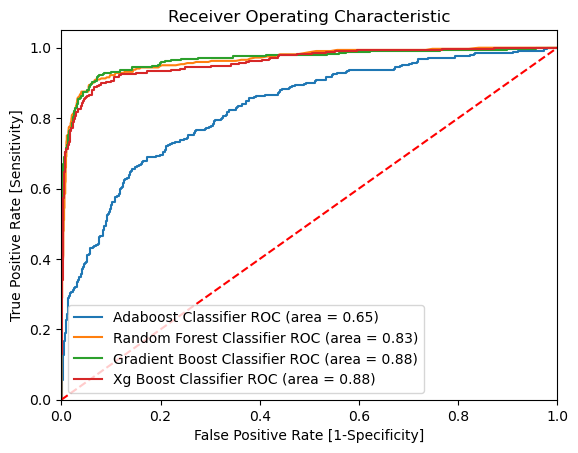

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_models = [
    {
        'label': 'Adaboost Classifier',
        'model': AdaBoostClassifier(n_estimators=model_param['AdaBoostClassifier']['n_estimators'],algorithm=model_param['AdaBoostClassifier']['algorithm']),
        'auc': 0.6457
    },
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=model_param['RF']['n_estimators'],min_samples_split=model_param['RF']['min_samples_split'],max_features=model_param['RF']['max_features']),
        'auc': 0.8256
    },
    {
        'label': 'Gradient Boost Classifier',
        'model': GradientBoostingClassifier(n_estimators=model_param['GradientBoostClassifier']['n_estimators'],min_samples_split=model_param['GradientBoostClassifier']['min_samples_split'],max_depth=model_param['GradientBoostClassifier']['max_depth'],loss=model_param['GradientBoostClassifier']['loss'],criterion=model_param['GradientBoostClassifier']['criterion']),
        'auc': 0.875
    },
    {
        'label': 'Xg Boost Classifier',
        'model': XGBClassifier(n_estimators=model_param['XgBoostClassifier']['n_estimators'],max_depth=model_param['XgBoostClassifier']['max_depth'],colsample_bytree=model_param['XgBoostClassifier']['colsample_bytree'],learning_rate=model_param['XgBoostClassifier']['learning_rate']),
        'auc': 0.875
    },
    
]

# create loop through all model 
for algo in auc_models:
    model = algo['model']
    model.fit(X_train,y_train)

    # compute false positive rate, true positive rate
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # calculate area under curve to display on plot
    plt.plot(fpr ,tpr , label='%s ROC (area = %0.2f)' % (algo['label'],algo['auc']))

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate [1-Specificity]')
plt.ylabel('True Positive Rate [Sensitivity]')

plt.title('Receiver Operating Characteristic')
plt.legend()

